# Medical Examiner Case Archives

Cook County (Chicago) medical examiner records, taken from [here](https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive/cjeq-bs86) after discovery via [Data is Plural](https://tinyletter.com/data-is-plural).

## Do your importing/setup

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Read in the data, check its row count and column types

In [2]:
df = pd.read_csv('case-archive-encoded.csv')

In [3]:
df.dtypes

Case Number              object
Date of Incident         object
Date of Death            object
Age                     float64
Gender                    int64
Race                      int64
Latino                     bool
Manner of Death          object
Primary Cause            object
Primary Cause Line B     object
Primary Cause Line C     object
Secondary Cause          object
Gun Related              object
Opioid Related           object
Incident Address         object
Incident City            object
longitude               float64
latitude                float64
OBJECTID                  int64
location                 object
dtype: object

In [4]:
df.shape

(22634, 20)

## Cleaning up your data

First you'll want to convert the `Race` and `Gender` columns from codes into actual text to make analysis easier.

### Gender codes

* `-1` - `Data missing`
* `0` - `Female`
* `1` - `Male`
* `2` - `Unknown`

### Race codes

* `-1` - `Data missing`
* `0` - `American Indian`
* `1` - `Asian`
* `2` - `Black`
* `3` - `Other`
* `4` - `Unknown`
* `5` - `White`

In [5]:
# Why not just add -1 = np.nan to the 2 dictionaries here?
df.Gender.replace({ 0 : 'female',
                  1 : 'male',
                  2 : 'unknown'}, inplace = True)

In [6]:
df.Race.replace({ 0 : 'american indian',
                1 : 'asian',
                2 : 'black',
                3 : 'other',
                4 : 'unknown',
                5 : 'white'}, inplace = True)

## What percent of the dataset is men, and what percent is women?

It should display as **Male** and **Female**, not as numbers.

In [7]:
df.Race.value_counts(normalize = True)*100

white              55.182469
black              41.380224
asian               1.511001
other               1.188478
-1                  0.547848
unknown             0.123708
american indian     0.066272
Name: Race, dtype: float64

In [8]:
df.Gender.value_counts(normalize = True)*100

male       71.388177
female     28.112574
-1          0.446231
unknown     0.053018
Name: Gender, dtype: float64

## Getting rid of "Data missing"

`Unknown` means that officially the gender or race is unknown, while `Data missing` means the record is incomplete. That means "Data missing" should have been `NaN`!

Go back to your `read_csv` many cells before and make it so that "Data missing" is automatically set as `NaN`.

- *Tip: Do not use `.replace` for this one!*
- *Tip: Look at the options for `read_csv`, there's something that lets you specify missing values*
- *Tip: It isn't `"Data missing"` - think about how you already replaced*
- *Tip: Be sure you're using an array when you tell it what the 'missing' options are*

### After you've done this, re-run all of the the previous cells and confirm that `"Data missing"` does not exist any more

## What is the most common race in the dataset? We want percentages.

We'll come back to this later, I'm just having you check the column for now.

In [9]:
df = pd.read_csv('case-archive-encoded.csv', na_values={'Race' : -1, 'Gender' : -1})

In [10]:
df.Race.replace({ 0 : 'american indian',
                1 : 'asian',
                2 : 'black',
                3 : 'other',
                4 : 'unknown',
                5 : 'white'}, inplace = True)

In [11]:
df.Gender.replace({ 0 : 'female',
                  1 : 'male',
                  2 : 'unknown'}, inplace = True)

In [12]:
df.Gender.value_counts(normalize = True)*100

male       71.708161
female     28.238583
unknown     0.053255
Name: Gender, dtype: float64

In [13]:
df.Race.value_counts(normalize = True)*100

white              55.486450
black              41.608174
asian               1.519325
other               1.195024
unknown             0.124389
american indian     0.066637
Name: Race, dtype: float64

## Do a `.value_counts()` on the `Opioid Related` column

In [14]:
df['Opioid Related'].value_counts()

True    3378
Name: Opioid Related, dtype: int64

## That's weird. Did everyone die from opioids? Try again, but including missing data.

In [15]:
df['Opioid Related'].value_counts()

True    3378
Name: Opioid Related, dtype: int64

In [16]:
df['Opioid Related'].value_counts(dropna = False)

NaN     19256
True     3378
Name: Opioid Related, dtype: int64

## Cleaning up True/False columns

For some reason in this dataset, the True/False columns are either `True` or `NaN`. `NaN` causes a lot of problems, I'd rather have it be false.

You can use [`fillna`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html) to fill in empty data - it's like `.replace` but for `NaN`.

### Replace all `NaN` values with `False` for the "Gun Related" and "Opioid Related" columns.

In [17]:
df['Opioid Related'].fillna(False, inplace = True)
df['Gun Related'].fillna(False, inplace = True)

### Do another value counts on Opioid Related to make sure it has both True and False values

In [18]:
df['Opioid Related'].value_counts()

False    19256
True      3378
Name: Opioid Related, dtype: int64

In [19]:
df['Gun Related'].value_counts()

False    19615
True      3019
Name: Gun Related, dtype: int64

# Back to analysis!

## What's the average age people were when they died?

In [20]:
df.Age.median()

53.0

## Let's look at how the oldest people died

We're just going to browse. Read through how the **oldest 30 people died.**

In [21]:
df.sort_values(by = 'Age', ascending = False)['Primary Cause'].head(30)

21142                              COMPLICATIONS OF A FALL
17602                          ACUTE MYOCARDIAL INFARCTION
12106                       ORGANIC CARDIOVASCULAR DISEASE
4942                                 COMPLICATIONS OF FALL
9376               ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE
8653     HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...
14697                 INHALATION OF PRODUCTS OF COMBUSTION
11558          COMPLICATIONS OF LEFT FEMORAL NECK FRACTURE
9904                        ORGANIC CARDIOVASCULAR DISEASE
13498                       ORGANIC CARDIOVASCULAR DISEASE
5621     HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCUL...
8656                        ORGANIC CARDIOVASCULAR DISEASE
8780                    COMPLICATIONS OF FRACTURE OF FEMUR
5817                                                 ASCVD
4239                                       FRACTURE OF HIP
7898                   COMPLICATIONS OF RIGHT HIP FRACTURE
14044                       ORGANIC CARDIOVASCULAR DISEA

## Seems like a lot of problems with fractures

### What's the median age of someone dying from a cause that involves a fracture?

Are fractures especially dangerous for the elderly?

- *Tip: Filter for a cause that involves a fracture, then take the median age*
- *Tip: If you get a "cannot index NA values" error, the problem is it's trying to search `NaN` values and doesn't know what to do with them. You need to tell pandas to count `NaN` as false by setting another option - it isn't `NaN=False`, but it's close!*

In [22]:
df[df['Primary Cause'].str.contains("FRACT", na = False)].Age.median()

86.0

### To get a "compared to what?", what's the median age of _anyone_ dying an accidental death?

In [23]:
df[df['Manner of Death'] == 'ACCIDENT'].Age.median()

51.0

### What's the median age of each manner of death?

It looks like different kinds of death might happen to different ages of people. Let's investigate that further.

In [24]:
df.groupby(by = 'Manner of Death').Age.median()

Manner of Death
ACCIDENT        51.0
HOMICIDE        26.0
NATURAL         61.0
PENDING         47.0
SUICIDE         45.0
UNDETERMINED    21.0
Name: Age, dtype: float64

### Who is the oldest homicide victim?

It looks like homicide is for young people, so maybe we'll find an interesting outlier?

In [25]:
df[df['Manner of Death'] == 'HOMICIDE'].sort_values(by = 'Age', ascending = False).head(5)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,female,black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
7671,ME2015-04626,10/26/2015 02:54:00 AM,10/26/2015 03:03:00 AM,89.0,female,black,False,HOMICIDE,MULTIPLE BLUNT AND SHARP FORCE INJURIES,NaN,NaN,NaN,False,False,5127 S. MICHIGAN AVE,CHICAGO,-87.622226,41.801227,72726,"(41.8012268, -87.6222263)"
7932,ME2015-04899,11/07/2015 07:48:00 PM,11/13/2015 08:30:00 AM,89.0,female,white,False,HOMICIDE,COMPLICATIONS OF INHALATION OF PRODUCTS OF COM...,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,False,2035 HAGEN LANE,FLOSSMOOR,-87.666703,41.544741,57213,"(41.5447408, -87.6667028)"
1823,ME2014-00722,09/25/2014 04:53:00 AM,09/28/2014 05:50:00 PM,88.0,male,black,False,HOMICIDE,CRANIOCEREBRAL INJURIES,NaN,NaN,NaN,False,False,8501 SOUTH COTTAGE GROVE,CHICAGO,-87.604682,41.740141,55877,"(41.7401408, -87.6046817)"
18445,ME2017-03713,08/10/2017 04:04:00 PM,08/10/2017 04:31:00 PM,86.0,male,white,False,HOMICIDE,GUNSHOT WOUND TO THE HEAD,NaN,NaN,NaN,True,False,4172 S. WALLACE,CHICAGO,-87.641131,41.818299,64788,"(41.8182994, -87.6411312)"


## Investigating toxicity-related homicides

She was old, and was purposefully overdosed on morphine and hydrocodone. Might have been euthenasia? Let's find similar cases.

### Find every homicide where the primary cause of death is some sort of toxicity

Toxicity can just overdose. You should have **ten rows**.

- *Tip: If you're doing this as one statement, make sure you use your parentheses correctly. If you leave them out, you'll have zero rows*
- *Tip: You could make a homicides-only dataframe if you wanted to*

In [26]:
homicides_tox = df[(df['Manner of Death'] == 'HOMICIDE') & (df['Primary Cause'].str.contains('TOXICITY', na=False))]
homicides_tox

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
3702,ME2015-00519,02/03/2015 08:21:00 AM,02/04/2015 08:34:00 AM,98.0,female,black,False,HOMICIDE,MORPHINE AND HYDROCODONE TOXICITY,NaN,NaN,HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULA...,False,True,16300 louis Ave,SOUTH HOLLAND,-87.609278,41.598109,64404,"(41.5981086, -87.6092784)"
5395,ME2015-02286,05/27/2015 03:15:00 PM,06/03/2015 07:25:00 PM,28.0,female,white,False,HOMICIDE,"COMPLICATIONS OF AMITRIPTYLINE AND METABOLITE,...",NaN,NaN,NaN,False,False,1102 S. Springinsguth Rd. #1D,SCHAUMBURG,-88.119741,42.005376,60663,"(42.005376, -88.1197414)"
6144,ME2015-03058,07/18/2015 07:00:00 AM,07/19/2015 02:05:00 AM,10.0,male,black,False,HOMICIDE,CARBON MONOXIDE TOXICITY,INCENDIARY HOUSE FIRE,NaN,NaN,False,False,8327 S. DREXEL,CHICAGO,-87.602328,41.743167,68218,"(41.7431675, -87.6023283)"
6764,ME2015-03692,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,28.0,male,white,True,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,NaN,False,False,5209 S Lorel Avenue,CHICAGO,-87.755913,41.798035,72663,"(41.7980351, -87.7559129)"
6765,ME2015-03693,08/29/2015 09:41:00 AM,08/29/2015 01:00:00 PM,63.0,male,other,False,HOMICIDE,CARBON MONOXIDE TOXICITY,HOUSE FIRE,NaN,"ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE, ACUTE...",False,False,5205 S. Lorel,CHICAGO,-87.756075,41.798102,73036,"(41.7981017, -87.7560751)"
7612,ME2015-04564,10/22/2015 10:39:00 AM,10/22/2015 11:05:00 AM,31.0,male,other,False,HOMICIDE,HEROIN AND ETHANOL TOXICITY,NaN,NaN,NaN,False,True,5240 NORTH SHERIDAN APT 417,CHICAGO,-87.655620,41.977582,74058,"(41.977582, -87.6556196)"
12656,ME2016-04092,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,4.0,female,black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68043,"(41.7477108, -87.5642452)"
12657,ME2016-04093,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,7.0,female,black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8112 S. Essex Avenue,CHICAGO,-87.564245,41.747711,68054,"(41.7477108, -87.5642452)"
12660,ME2016-04096,08/23/2016 01:37:00 AM,08/23/2016 06:45:00 AM,56.0,male,black,False,HOMICIDE,THERMAL INJURIES AND CARBON MONOXIDE TOXICITY,NaN,NaN,NaN,False,False,8114 S. Essex Avenue,CHICAGO,-87.564246,41.747673,67699,"(41.7476732, -87.5642456)"
13050,ME2016-04490,09/16/2016 02:45:00 AM,09/16/2016 03:34:00 AM,59.0,male,white,True,HOMICIDE,CARBON MONOXIDE TOXICITY,GARAGE FIRE,NaN,NaN,False,False,2151 W 21st Street,CHICAGO,-87.680361,41.853700,65250,"(41.8536999, -87.6803607)"


### Okay, nope, we were wrong.

Those were almost **all from fires**. Apparently homicide is not the best place to go looking for toxicity. What's the most popular manner of death for primary causes involving toxicity?

- *Tip: Remember that `['colname']` is the same as `.colname`. You can't do `.col with spaces` so you'll need to do `['col with spaces']` a lot in this dataset
- *Tip: Or I guess if you really wanted to, you could rename your columns to have spaces in them (IF YOU DO THIS DON'T DO IT IN EXCEL BECAUSE IT WILL PROBABLY BREAK YOUR CSV.)*

In [27]:
df[df['Primary Cause'].str.contains('TOXICITY', na=False)]['Manner of Death'].value_counts()

ACCIDENT        3236
SUICIDE          221
UNDETERMINED      42
HOMICIDE          10
NATURAL            1
Name: Manner of Death, dtype: int64

### Okay, toxicity deaths (overdoses) are mostly accidents. Let's look at the first 30 accidental deaths involving toxicity.

- *Tip: Remember your parentheses!*

In [28]:
df[(df['Manner of Death'] == 'ACCIDENT') & (df['Primary Cause'].str.contains('TOXICITY', na=False))].head(30)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,male,white,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
45,ME2018-00910,02/19/2018 08:00:00 PM,02/19/2018 08:22:00 PM,56.0,male,black,False,ACCIDENT,COMBINED DRUG (COCAINE AND HEROIN) TOXICITY,NaN,NaN,NaN,False,True,7724 SOUTH LOOMIS BLVD #1,CHICAGO,-87.658932,41.753282,69589,"(41.7532818, -87.6589318)"
51,ME2018-00400,01/20/2018 11:15:00 AM,01/20/2018 11:57:00 AM,19.0,male,white,False,ACCIDENT,HEROIN TOXICITY,NaN,NaN,NaN,False,True,"5719 S. Kimbark, Apt. 3",CHICAGO,-87.594142,41.790743,77880,"(41.7907435, -87.5941419)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,male,white,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,male,white,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
65,ME2018-01129,03/03/2018 03:45:00 AM,03/03/2018 04:31:00 AM,34.0,male,black,False,ACCIDENT,ACUTE ETHANOL TOXICITY,NaN,NaN,NaN,False,False,7899 SOUTH SHORE,CHICAGO,-87.548113,41.752056,68080,"(41.7520559, -87.5481134)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,male,white,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,male,asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,male,white,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,female,white,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN


## Wow, that's a lot of drug overdoses. What's more popular for overdosing: heroin, fentanyl, cocaine, or ethanol?

You can count something like "COMBINED ETHANOL, NORDIAZEPAM, AND FENTANYL TOXICITY" under both ethanol and fentanyl.

- *Tip: Search for them individually*

In [29]:
hero = len(df[df['Primary Cause'].str.contains('HEROIN', na=False)])
fenta = len(df[df['Primary Cause'].str.contains('FENTANYL', na=False)])
coca = len(df[df['Primary Cause'].str.contains('COCA', na=False)])
etha = len(df[df['Primary Cause'].str.contains('ETHANOL', na=False)])
total_overdose = hero + fenta + coca + etha

In [30]:
print('Heroin related deaths total: {hero}\tpercent: {heroperc}\nFentanyl related deaths total: {fenta}\tpercent: {fentaperc}\nCocaine related deaths total: {coca}\tpercent: {cocaperc}\nEthanol related deaths total: {etha}\tpercent: {ethaperc}'.format(hero = hero, heroperc = hero/total_overdose*100, fenta = fenta, fentaperc= fenta/total_overdose*100, coca = coca, cocaperc = coca/total_overdose*100, etha = etha, ethaperc = etha/total_overdose*100))

Heroin related deaths total: 2022	percent: 34.23057389537836
Fentanyl related deaths total: 1493	percent: 25.275097342136448
Cocaine related deaths total: 1065	percent: 18.02945657694261
Ethanol related deaths total: 1327	percent: 22.464872185542575


# Cleaning up Primary Cause

Let's stop investigating for a second and maybe clean up this "Primary Cause" column.

## What are the most common Primary Cause of death? Include `NaN` values

- *Tip: There is an option that keeps `NaN` values when counting things in a column.*

In [31]:
df['Primary Cause'].value_counts(dropna = False)

ORGANIC CARDIOVASCULAR DISEASE                                                                                                                 1983
MULTIPLE GUNSHOT WOUNDS                                                                                                                        1377
HYPERTENSIVE CARDIOVASCULAR DISEASE                                                                                                            1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                                                         974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                                                            960
MULTIPLE INJURIES                                                                                                                               941
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                                        

In [32]:
df['Primary Cause'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
5                                        MULTIPLE INJURIES
6                                    GUNSHOT WOUND TO HEAD
7                                                  PENDING
8                                                  PENDING
9                                                  PENDING
10                                   GUNSHOT WOUND OF HEAD
11                                       MULTIPLE INJURIES
12                                       MULTIPLE INJURIES
13                         COMPLICATIONS OF MORBID OBESITY
14                                 MULTIPLE GUNSHOT WOUNDS
15       COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...
16          

## That was horrible looking. I don't want to read through that - how many `NaN` causes of death are there?

- *Tip: You can use `isnull()` to see if it's missing data, but how do you count the results?*

In [33]:
df['Primary Cause'].isnull().sum()

124

## Remove all rows where the primary cause of death has not been filled out.

- *Tip: confirm that you have 22510 rows when you're done*

In [34]:
df.dropna(subset=['Primary Cause'], inplace=True)

In [35]:
df.shape

(22510, 20)

# Cardiovascular disease

Cardiovascular disease (heart disease) is the number one or number two killer in America.

### Filter for only rows where cardiovascular disease was a primary cause

- *Tip: I hope you know how to deal with the `NaN` error message by now!*

In [36]:
cardio = df[df['Primary Cause'].str.contains('CARDIO', na=False)]
cardio

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
18,ME2018-01135,03/03/2018 09:30:00 AM,03/03/2018 10:05:00 AM,55.0,male,black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,10034 S. MICHICAGN AVE. APT 2,NaN,NaN,NaN,71064,NaN
27,ME2018-02131,05/03/2018 07:15:00 PM,05/03/2018 08:00:00 PM,48.0,male,white,False,NATURAL,ATHEROSCLEROTIC AND HYPERTENSIVE CARDIOVASCULA...,NaN,NaN,OBESITY,False,False,2631 West Rascher Avenue,CHICAGO,-87.695479,41.980215,77843,"(41.9802154, -87.6954789)"
28,ME2018-02134,05/03/2018 06:20:00 PM,05/03/2018 07:01:00 PM,76.0,male,white,False,NATURAL,HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR D...,NaN,NaN,DIABETES MELLITUS AND OBESITY,False,False,8108 ODELL AVENUE,BRIDGEVIEW,-87.803607,41.744014,77849,"(41.7440145, -87.8036075)"
34,ME2018-02170,05/06/2018 02:05:00 PM,05/06/2018 02:46:00 PM,64.0,male,black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,4250 S. PRINCETON APT 412,CHICAGO,-87.634704,41.816742,78016,"(41.8167422, -87.6347043)"
43,ME2014-01078,10/18/2014 02:30:00 PM,10/18/2014 03:55:00 PM,67.0,male,white,False,NATURAL,ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,610 SOUTH MAWATA,MOUNT PROSPECT,NaN,NaN,61280,NaN
57,ME2018-02186,05/07/2018 12:26:00 PM,05/07/2018 12:53:00 PM,66.0,male,black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,146 N. CENTRAL #1D,CHICAGO,-87.765474,41.883634,78010,"(41.8836343, -87.7654736)"
64,ME2018-00995,02/23/2018 09:35:00 AM,02/23/2018 09:50:00 AM,70.0,male,black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NaN,False,False,5700 NORTH SHERIDAN APT 1003,NaN,-87.655755,41.985857,55722,"(41.9858569, -87.6557545)"
66,ME2018-01148,03/03/2018 04:30:00 PM,03/03/2018 05:09:00 PM,58.0,female,white,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,OBESITY,False,False,11011 JORDAN DRIVE,OAK LAWN,NaN,NaN,59051,NaN
71,ME2018-01411,03/19/2018 12:00:00 AM,03/19/2018 11:04:00 AM,59.0,female,black,False,NATURAL,HYPERTENSIVE CARDIOVASCULAR DISEASE,NaN,NaN,"CHRONIC OBSTRUCTIVE PULMONARY DISEASE, DIABETE...",False,False,7804 South Maryland 1st floor,CHICAGO,-87.604086,41.753007,77882,"(41.7530066, -87.6040862)"
72,ME2018-01910,05/01/2018 10:50:00 AM,05/01/2018 10:59:00 AM,65.0,male,black,False,NATURAL,ORGANIC CARDIOVASCULAR DISEASE,NaN,NaN,NON-TRAUMATIC SEIZURE DISORDER,False,False,841 Williams Street #1D,CALUMET CITY,-87.545633,41.599656,77889,"(41.599656, -87.5456329)"


### What are the different types?

In [37]:
cardio['Primary Cause'].value_counts()

ORGANIC CARDIOVASCULAR DISEASE                                        1983
HYPERTENSIVE CARDIOVASCULAR DISEASE                                   1177
ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                                974
HYPERTENSIVE ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                   960
HYPERTENSIVE AND ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE               460
HYPERTENSIVE AND ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                298
ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                                 140
HYPERTENSIVE-ARTERIOSCLEROTIC CARDIOVASCULAR DISEASE                    90
ORGANIC  CARDIOVASCULAR DISEASE                                         77
DILATED CARDIOMYOPATHY                                                  58
HYPERTENSIVE ATHEROSCLEROTIC CARDIOVASCULAR DISEASE                     38
ORGANIC CARDIOVASCUALR DISEASE.                                         36
ORGANIC CARDIOVASCULAR DISEASE.                                         19
ATHEROSCLEROTIC AND HYPER

### Replace all of those with a nice simple 'CARDIOVASCULAR DISEASE'

- *Tip: you can use `.replace` or `.str.replace`, but they each involve different things! I suggest `.replace`, it looks a little cleaner in this situation*
- *Tip: for `.replace`, you need to give it more options than usual*
- *Tip: for `.str.replace`, it won't automatically save back into the column, you need to do that yourself*

In [38]:
df['Primary Cause'] = df['Primary Cause'].str.replace('.*CARDIO.*', 'CARDIOVASCULAR DISEASE')

### Check the top 5 primary causes. Cardiovascular disease should be first with about 28.4%

In [39]:
# Maybe I should've typed "CARDIOVASCULAR" not just "CARDIO" in my replace statement?
df['Primary Cause'].value_counts(normalize = True)*100

CARDIOVASCULAR DISEASE                                                                                                                         29.551311
MULTIPLE GUNSHOT WOUNDS                                                                                                                         6.117281
MULTIPLE INJURIES                                                                                                                               4.180364
PENDING                                                                                                                                         2.007996
GUNSHOT WOUND OF HEAD                                                                                                                           1.954687
HANGING                                                                                                                                         1.434918
MULTIPLE BLUNT FORCE INJURIES                                                     

We could also clean up gunshots, but... let's just move on.

# The Opioid Epidemic

America has a [big problem with fentanyl](https://www.theatlantic.com/health/archive/2018/05/americas-opioid-crisis-is-now-a-fentanyl-crisis/559445/) and other opioids.

## Find all of the rows where fentanyl was part of the primary cause of death

We don't need `na=False` any more because we *dropped the rows without primary causes*.

In [40]:
df[df['Primary Cause'].str.contains('FENTA')]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
15,ME2018-01127,03/03/2018 02:15:00 AM,03/03/2018 02:24:00 AM,37.0,male,white,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN, FENTANYL) TOXI...",NaN,NaN,NaN,False,True,6547 W. 111TH APT W-27,WORTH,-87.781732,41.689640,63784,"(41.6896403, -87.7817317)"
53,ME2018-00643,02/03/2018 10:45:00 AM,02/03/2018 11:11:00 AM,35.0,male,white,False,ACCIDENT,"ETHANOL AND COMBINED DRUG (PROBABLE HEROIN, CY...",NaN,NaN,NaN,False,True,"2540 N. Manheim Road, Rm#215",FRANKLIN PARK,NaN,NaN,77879,NaN
54,ME2018-00671,02/05/2018 12:00:00 AM,02/05/2018 12:10:00 AM,27.0,male,white,False,ACCIDENT,COMBINED FENTANYL AND PROBABLE HEROIN TOXICITY,NaN,NaN,OBESITY,False,True,3435 W. VAN BUREN,CHICAGO,-87.711994,41.875391,77910,"(41.8753913, -87.7119935)"
69,ME2018-01356,03/15/2018 01:31:00 PM,03/15/2018 01:44:00 PM,26.0,male,white,False,ACCIDENT,"FENTANYL, HEROIN, AND ALPRAZOLAM TOXICITY",NaN,NaN,NaN,False,True,710 N. 4TH AVENUE,MAYWOOD,-87.838564,41.893982,77870,"(41.8939818, -87.8385636)"
93,ME2018-01560,03/29/2018 06:50:00 PM,03/29/2018 07:12:00 PM,38.0,male,asian,False,ACCIDENT,COCAINE AND FENTANYL TOXICITY,NaN,NaN,NaN,False,True,535 N MICHIGAN AVE #2705,CHICAGO,-87.623541,41.891975,66297,"(41.8919752, -87.6235405)"
99,ME2018-01570,03/30/2018 03:33:00 PM,03/30/2018 04:20:00 PM,50.0,male,white,False,ACCIDENT,"COCAINE, FENTANYL AND ACETYL FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1042 N. KNOLLWOOD DR. UNIT A,SCHAUMBURG,-88.138219,42.044579,62417,"(42.0445787, -88.1382195)"
102,ME2018-01574,03/30/2018 10:43:00 PM,03/30/2018 11:03:00 PM,40.0,female,white,False,ACCIDENT,"COMBINED DRUG (FENTANYL, METHADONE, AND ALPRAZ...",NaN,NaN,NaN,False,True,4345 AUTHUR AVE.,BROOKFIELD,NaN,NaN,63618,NaN
106,ME2018-01103,03/01/2018 02:02:00 PM,03/01/2018 02:45:00 PM,68.0,male,black,False,ACCIDENT,COMBINED DRUG (FENTANYL AND METHADONE) TOXICITY,NaN,NaN,NaN,False,True,1541 SOUTH HAMLIN,CHICAGO,-87.719819,41.859519,78255,"(41.8595195, -87.7198186)"
107,ME2018-02197,05/07/2018 09:27:00 AM,05/08/2018 05:23:00 AM,38.0,female,white,False,ACCIDENT,FENTANYL AND COCAINE TOXICITY,NaN,NaN,NaN,False,True,15611 DIXIE HWY (APT 2),HARVEY,-87.669333,41.605710,78760,"(41.6057103, -87.6693327)"
109,ME2017-05643,12/02/2017 02:50:00 PM,12/02/2017 02:44:00 PM,45.0,male,white,False,ACCIDENT,"COMBINED DRUG (HEROIN, FENTANYL, AND ACETYL FE...",NaN,NaN,NaN,False,True,4023 West Congress Parkway,CHICAGO,-87.726373,41.874299,77943,"(41.8742991, -87.7263732)"


## Fentanyl and race

In the late 80's and 90's, the [crack cocaine epidemic](https://en.wikipedia.org/wiki/Crack_epidemic) swept through inner cities in the US. It was treated primarily as a crime problem, while many people say fentanyl and heroin overdoses are being treated as a medical problem due to the racial differences - the crack epidemic mainly affected Black communities, while fentanyl seems to be a problem for everyone.

### How does the racial breakdown of fentanyl deaths compare to the racial breakdown of other causes of death? How about compared to causes of accidental death?

In [41]:
df[(df['Primary Cause'].str.contains('FENTA')) & (df['Race'] == 'black')]

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,Primary Cause Line C,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location
106,ME2018-01103,03/01/2018 02:02:00 PM,03/01/2018 02:45:00 PM,68.0,male,black,False,ACCIDENT,COMBINED DRUG (FENTANYL AND METHADONE) TOXICITY,NaN,NaN,NaN,False,True,1541 SOUTH HAMLIN,CHICAGO,-87.719819,41.859519,78255,"(41.8595195, -87.7198186)"
388,ME2018-01138,03/03/2018 09:30:00 AM,03/03/2018 10:13:00 AM,27.0,male,black,False,ACCIDENT,FENTANYL AND ALPRAZOLAM TOXICITY,NaN,NaN,NaN,False,True,7829 S. PEORIA 2ND FLOOR APT,CHICAGO,-87.646202,41.751532,68896,"(41.7515321, -87.6462021)"
474,ME2018-01612,04/02/2018 12:16:00 PM,04/02/2018 12:26:00 PM,NaN,male,black,False,ACCIDENT,"COMBINED DRUG (COCAINE, HEROIN AND FENTANYL) T...",NaN,NaN,NaN,False,True,"8145 South State Street, Second Floor",CHICAGO,-87.624116,41.745988,68490,"(41.745988, -87.6241159)"
540,ME2017-05918,12/18/2017 08:00:00 PM,12/18/2017 08:41:00 PM,55.0,male,black,False,ACCIDENT,"COMBINED DRUG (FENTANYL, HEROIN, ETHANOL) TOXI...",NaN,NaN,NaN,False,True,1308 SOUTH MILLARD,CHICAGO,-87.716841,41.864122,70029,"(41.8641215, -87.7168414)"
572,ME2018-01646,04/04/2018 03:15:00 PM,04/04/2018 02:07:00 PM,56.0,male,black,False,ACCIDENT,"COMBINED DRUG TOXICTY (ACETYL FENTANYL, FENTAN...",NaN,NaN,NaN,False,True,630 W. HARRISON,CHICAGO,-87.643169,41.874865,66186,"(41.8748654, -87.6431688)"
594,ME2018-00583,01/30/2018 04:57:00 PM,01/30/2018 05:07:00 PM,54.0,female,black,False,ACCIDENT,"COMBINED DRUG TOXICITY (FENTANYL, ACETYL FENTA...",NaN,NaN,NaN,False,True,2106 SOUTH 15TH AVENUE,BROADVIEW,-87.850941,41.865586,61639,"(41.8655864, -87.8509409)"
679,ME2017-05689,12/05/2017 01:30:00 PM,12/05/2017 02:40:00 PM,47.0,female,black,False,ACCIDENT,"COMBINED DRUG (CYCLOPROPYL FENTANYL, ACRYL FEN...",NaN,NaN,NaN,False,True,1646 EAST 68TH STREET APT. #1A,CHICAGO,-87.584284,41.771692,72140,"(41.7716922, -87.5842841)"
687,ME2018-01649,04/04/2018 08:36:00 PM,04/04/2018 08:47:00 PM,51.0,female,black,False,ACCIDENT,"COCAINE, HEROIN AND FENTANYL TOXICITY",NaN,NaN,NaN,False,True,1253 WEST 72ND STREET FL 2,CHICAGO,-87.656133,41.763003,73440,"(41.7630027, -87.6561327)"
785,ME2018-01515,03/26/2018 06:27:00 AM,03/26/2018 06:39:00 AM,45.0,male,black,False,ACCIDENT,"COMBINED DRUG TOXICITY (FENTANYL, ACETYL FENTA...",NaN,NaN,NaN,False,True,"Starlight Motel, 466 W. 162nd Street #25",SOUTH HOLLAND,NaN,NaN,63860,NaN
830,ME2017-05770,12/10/2017 04:38:00 PM,12/10/2017 05:00:00 PM,53.0,male,black,False,ACCIDENT,"COMBINED DRUG (ETHANOL, HEROIN, FENTANYL, AND ...",NaN,NaN,NaN,False,True,4110 WEST TAYLOR STREET APT # BASEMENT,CHICAGO,-87.728277,41.869244,65622,"(41.8692442, -87.7282773)"


In [42]:
df[(df['Primary Cause'].str.contains('FENTA'))].Race.value_counts(normalize = True)*100

white              55.696203
black              43.437708
asian               0.399734
other               0.333111
unknown             0.066622
american indian     0.066622
Name: Race, dtype: float64

In [43]:
df[(df['Manner of Death'] == 'ACCIDENT')].Race.value_counts(normalize = True)*100

white              64.141282
black              32.930672
other               1.391807
asian               1.352416
unknown             0.091912
american indian     0.091912
Name: Race, dtype: float64

In [44]:
df[(df['Primary Cause'].str.contains('SHOT'))].Race.value_counts(normalize = True)*100

black      70.133333
white      28.466667
other       1.033333
asian       0.333333
unknown     0.033333
Name: Race, dtype: float64

In [45]:
df[(df['Primary Cause'].str.contains('FALL'))].Race.value_counts(normalize = True)*100

white    79.638009
black    16.742081
asian     2.262443
other     1.357466
Name: Race, dtype: float64

In [46]:
df[(df['Primary Cause'].str.contains('ALCO'))].Race.value_counts(normalize = True)*100

white    67.272727
black    31.272727
other     1.090909
asian     0.363636
Name: Race, dtype: float64

In [47]:
df[(df['Primary Cause'].str.contains('DROWN'))].Race.value_counts(normalize = True)*100

white      52.525253
black      37.373737
asian       5.555556
other       4.040404
unknown     0.505051
Name: Race, dtype: float64

### Now compare it to homicides

In [48]:
df[(df['Manner of Death'] == 'HOMICIDE')].Race.value_counts(normalize = True)*100

black      77.425044
white      21.199295
other       1.164021
asian       0.176367
unknown     0.035273
Name: Race, dtype: float64

### Now compare it to suicide

In [49]:
df[(df['Manner of Death'] == 'SUICIDE')].Race.value_counts(normalize = True)*100

white      79.836353
black      15.371128
asian       3.506721
other       1.227352
unknown     0.058445
Name: Race, dtype: float64

## These differences seems kind of crazy

Let's look at all of these at once: I want a breakdown of the most common manners of death for **men**, based on race.

Percentages, please, not raw numbers.

You can look at women, too, although I think the numbers are more surprising for men.

In [50]:
df[df['Gender'] == 'male'].groupby(by = 'Race')['Manner of Death'].value_counts(normalize = True)*100

Race             Manner of Death
american indian  NATURAL            50.000000
                 ACCIDENT           40.000000
                 PENDING            10.000000
asian            NATURAL            46.724891
                 ACCIDENT           29.257642
                 SUICIDE            19.213974
                 PENDING             2.183406
                 HOMICIDE            1.310044
                 UNDETERMINED        1.310044
black            NATURAL            36.561528
                 HOMICIDE           29.468384
                 ACCIDENT           26.180957
                 SUICIDE             3.154154
                 UNDETERMINED        2.487783
                 PENDING             2.147194
other            ACCIDENT           39.234450
                 NATURAL            32.535885
                 HOMICIDE           13.875598
                 SUICIDE             9.090909
                 UNDETERMINED        4.306220
                 PENDING             0.956938
u

## Back to drugs: what is the most popular opioid-related primary cause of death that does NOT involve fentanyl?

- *Tip: Pay attention to your column names! There's one that might tell you if something is opioid-related...*
- *Tip: Usually you can use `not` or `!` to means "not", but for pandas and `.isin` or `.str.contains` you need to use `~`*
- *Tip: For "and" in pandas you'll need to use `&`, and make sure all of your clauses have parens around them, e.g. `df[(df.col1 = 'A') & (df.col2 = 'B')]`.*

In [51]:
len(df[(df['Opioid Related'] == True) & (~df['Primary Cause'].str.contains('FENTA'))])

1877

# How do heroin and fentanyl deaths compare?

## Count the number of deaths involving heroin, the number of deaths involving fentanyl, and the number of deaths involving both.

- *Tip: This will take 3 different statements*
- *Tip: You should get `813` that include both*

In [52]:
len(df[(~df['Primary Cause'].str.contains('HEROIN')) & (df['Primary Cause'].str.contains('FENTANYL'))])

680

In [53]:
len(df[(df['Primary Cause'].str.contains('HEROIN')) & (~df['Primary Cause'].str.contains('FENTANYL'))])

1209

In [54]:
len(df[(df['Primary Cause'].str.contains('HEROIN')) & (df['Primary Cause'].str.contains('FENTANYL'))])

813

## That's weird.

I heard fentanyl really surpassed heroin in the past few years. Let's see how this 

### Pull the year out and store it in a new column called `year`

If you run `df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)`, it will pull out the year of each incident. **Store this in a new column called `year`.**

(It's regular expression stuff. `\d\d\d\d` means "four numbers in a row", and `()` + `.str.extract` means "pull it out".)

In [55]:
df['Year'] = df['Date of Incident'].str.extract("(\d\d\d\d)", expand=False)

### What is the datatype of the new `year` column?

In [56]:
df.Year.describe()

count     22510
unique        6
top        2016
freq       6288
Name: Year, dtype: object

## Convert this new column to an integer and save it back on top of itself

- *Tip: This uses is your friend `.astype`*
- *Tip: Make sure to save it back on top of itself!*

In [57]:
df['Year'] = df.Year.astype(int)

## Confirm the column is a number

In [58]:
df.Year.dtype

dtype('int64')

## Plot the number of opioid deaths by year

If you'd like to make it look nicer, do some sorting and get rid of 2018.

- *Tip: Think of it in a few steps. First, filter for opioid deaths. Then get the number of deaths for each year. Then plot it.*
- *Tip: What's up with 2018? Why's it look so weird? Can you get rid of it? Remember to use lots of parens!*
- *Tip: Make sure the earliest year is on the left. You might need to sort by something other than values.*

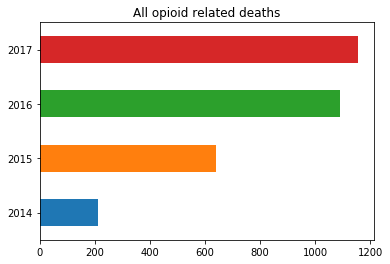

In [59]:
df[(df['Opioid Related'] == True) & (df.Year < 2018)].Year.value_counts().sort_values().plot(kind = 'barh', title = "All opioid related deaths")

## Plot the number of fentanyl deaths by year, and the number of heroin deaths by year

- *Tip: You'll want to look up how to use `ylim` - it will let you set each graphic to use the same scale. This should be separate graphics.*
- *Tip: Pay attention to the numbers on your axes. `sort_index()` will be your friend.*
- *Tip: You should probably get rid of 2018*

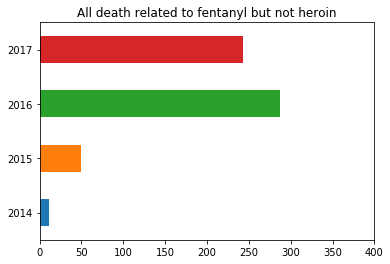

In [60]:
df[(~df['Primary Cause'].str.contains('HEROIN')) & (df['Primary Cause'].str.contains('FENTANYL')) & (df.Year < 2018)].Year.value_counts().sort_index().plot(kind = 'barh', xlim = (0,400), title = "All death related to fentanyl but not heroin")

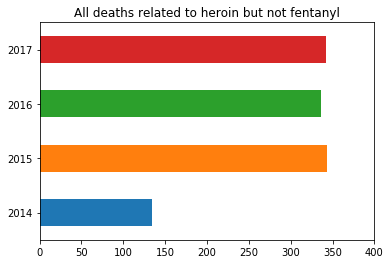

In [61]:
df[(df['Primary Cause'].str.contains('HEROIN')) & (~df['Primary Cause'].str.contains('FENTANYL')) & (df.Year < 2018)].Year.value_counts().sort_index().plot(kind = 'barh', xlim = (0,400), title = "All deaths related to heroin but not fentanyl")

## How does this compare to gun deaths?

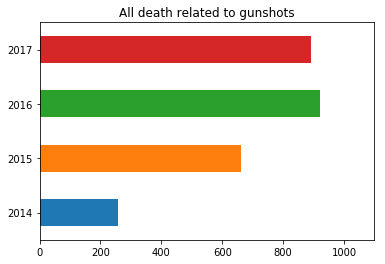

In [62]:
df[(df['Primary Cause'].str.contains('SHOT')) & (df.Year < 2018)].Year.value_counts().sort_index().plot(kind = 'barh', xlim = (0,1100), title = "All death related to gunshots")

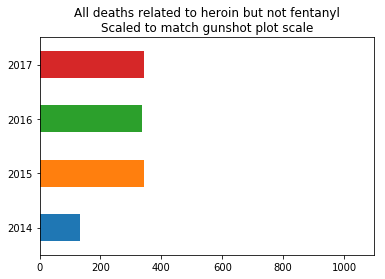

In [63]:
df[(df['Primary Cause'].str.contains('HEROIN')) & (~df['Primary Cause'].str.contains('FENTANYL')) & (df.Year < 2018)].Year.value_counts().sort_index().plot(kind = 'barh', xlim = (0,1100), title = "All deaths related to heroin but not fentanyl\nScaled to match gunshot plot scale")

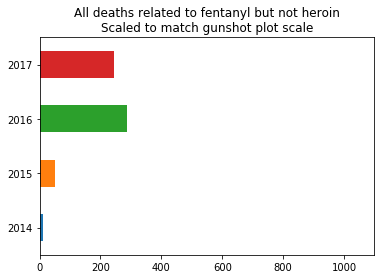

In [64]:
df[(~df['Primary Cause'].str.contains('HEROIN')) & (df['Primary Cause'].str.contains('FENTANYL')) & (df.Year < 2018)].Year.value_counts().sort_index().plot(kind = 'barh', xlim = (0,1100), title = "All deaths related to fentanyl but not heroin\nScaled to match gunshot plot scale")

## But hey: numbers can lie pretty easily!

The numbers are just so low in 2014 and much higher in 2017. What's going on there?

Well, maybe **there just isn't as much data from the earlier years**. Plot how many entries there are for each year.

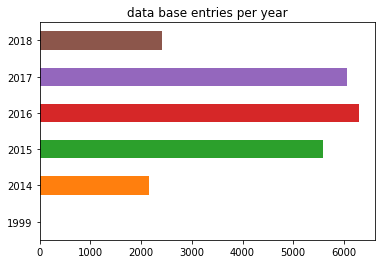

In [65]:
df.Year.value_counts().sort_index().plot(kind = 'barh', title = "data base entries per year")

And we don't know the best way to fix that up yet, so instead I'm going to give you a present.

# Is the true lesson here, don't move to Cook County, Illinois?

Cook County is basically Chicago. It's probably just certain areas that are trouble, right? Let's investigate that without even having a clue how mapping works.

## Fun bonus: Making cheating maps

### Make a new dataframe of every death in the actual city of Chicago

In [66]:
chicago = df[df['Incident City'] == 'CHICAGO']

### Confirm this new dataframe has 13,627 rows

In [67]:
chicago.shape

(13627, 21)

In [68]:
chicago.head(3)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Manner of Death,Primary Cause,Primary Cause Line B,...,Secondary Cause,Gun Related,Opioid Related,Incident Address,Incident City,longitude,latitude,OBJECTID,location,Year
6,ME2017-00971,02/25/2017 07:48:00 AM,02/25/2017 09:20:00 AM,55.0,male,white,False,UNDETERMINED,GUNSHOT WOUND TO HEAD,NaN,...,NaN,True,False,209 E. LAKE SHORE DRIVE,CHICAGO,-87.621421,41.900571,77930,"(41.900571, -87.6214206)",2017
7,ME2018-02147,05/04/2018 10:04:00 PM,05/04/2018 10:25:00 PM,47.0,male,black,False,PENDING,PENDING,NaN,...,NaN,False,False,1905 S. SPAULDING #1,CHICAGO,-87.707465,41.855148,78042,"(41.855148, -87.707465)",2018
8,ME2018-02152,05/05/2018 01:47:00 AM,05/05/2018 02:54:00 AM,3.0,male,white,True,PENDING,PENDING,NaN,...,NaN,False,False,1012 N. AVERS AVENUE APT#2,CHICAGO,NaN,NaN,78299,NaN,2018


### Use lat and long in the worst way possible to make a map

Use `longitude` and `latitude` and `plot` to make a rough map of the city. Chicago [looks like this](https://en.wikipedia.org/wiki/File:DuPage_County_Illinois_Incorporated_and_Unincorporated_areas_Chicago_Highlighted.svg)

- *Tip: Use the `latitude` and `longitude` columns*
- *Tip: You don't want a line graph, of course. Or a bar. What kind is the kind with dots on it?*
- *Tip: Use something like like `figsize=(10,5)` to specify the height and width of the map (but, you know, with better numbers that make it look like chicago)*

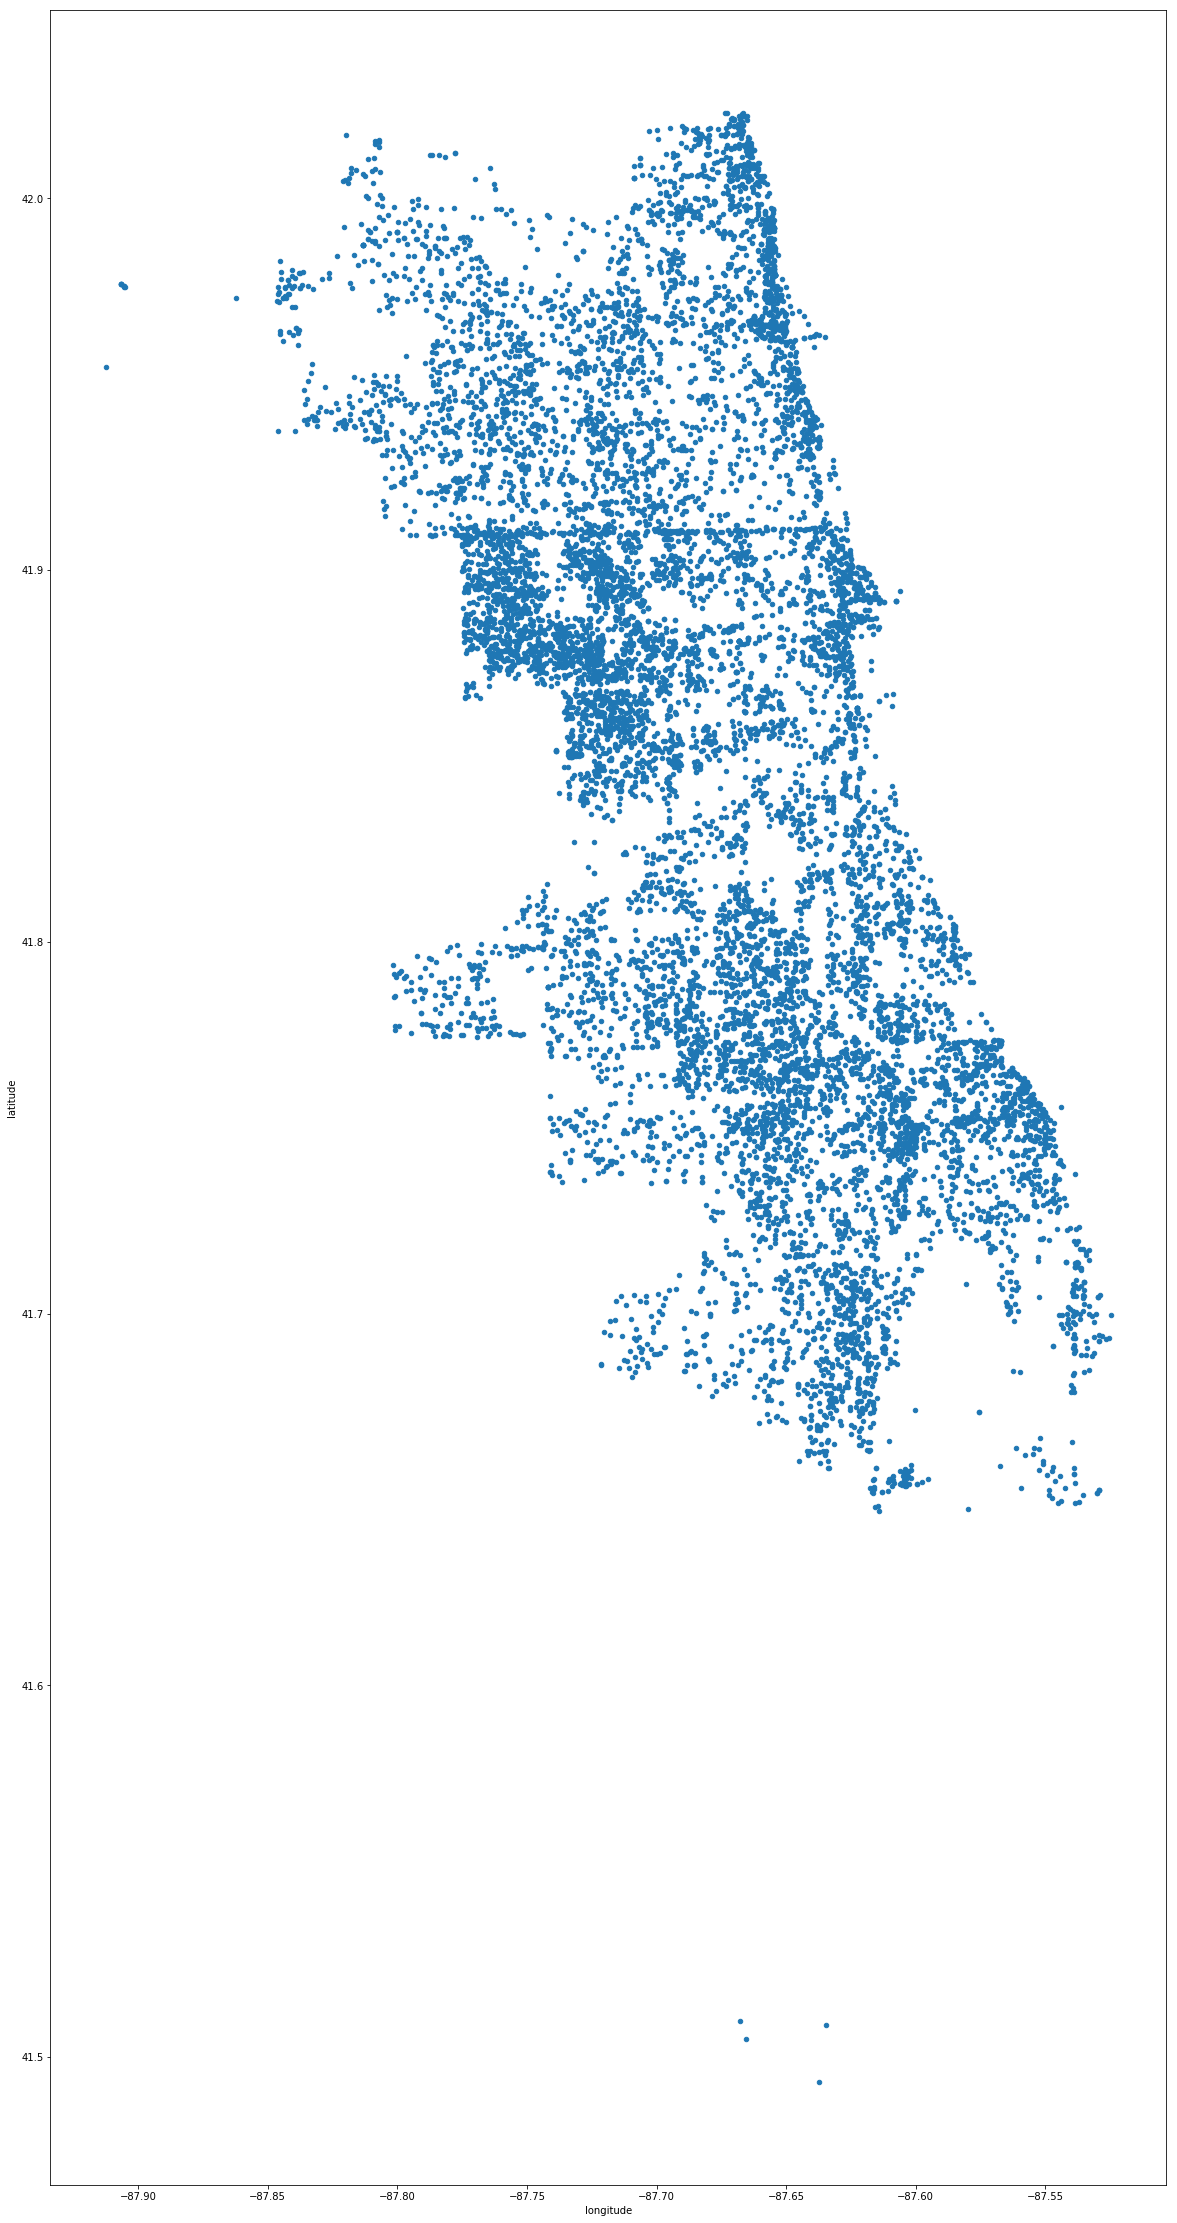

In [69]:
chicago.plot(x = 'longitude', y = 'latitude', kind = 'scatter', figsize = (20,40))

## Now let's find out where to live

Make a map of every non-homicide death in Chicago, then plot the homicides on top of it.

Use the `ax=df.plot` trick from the beer cans assignment to plot all of the rows representing homicides vs non-homicides. You can use `color='red'` to make one of them red, and `alpha=0.05` to make each mark very transparent to allow them to layer on top of each other.

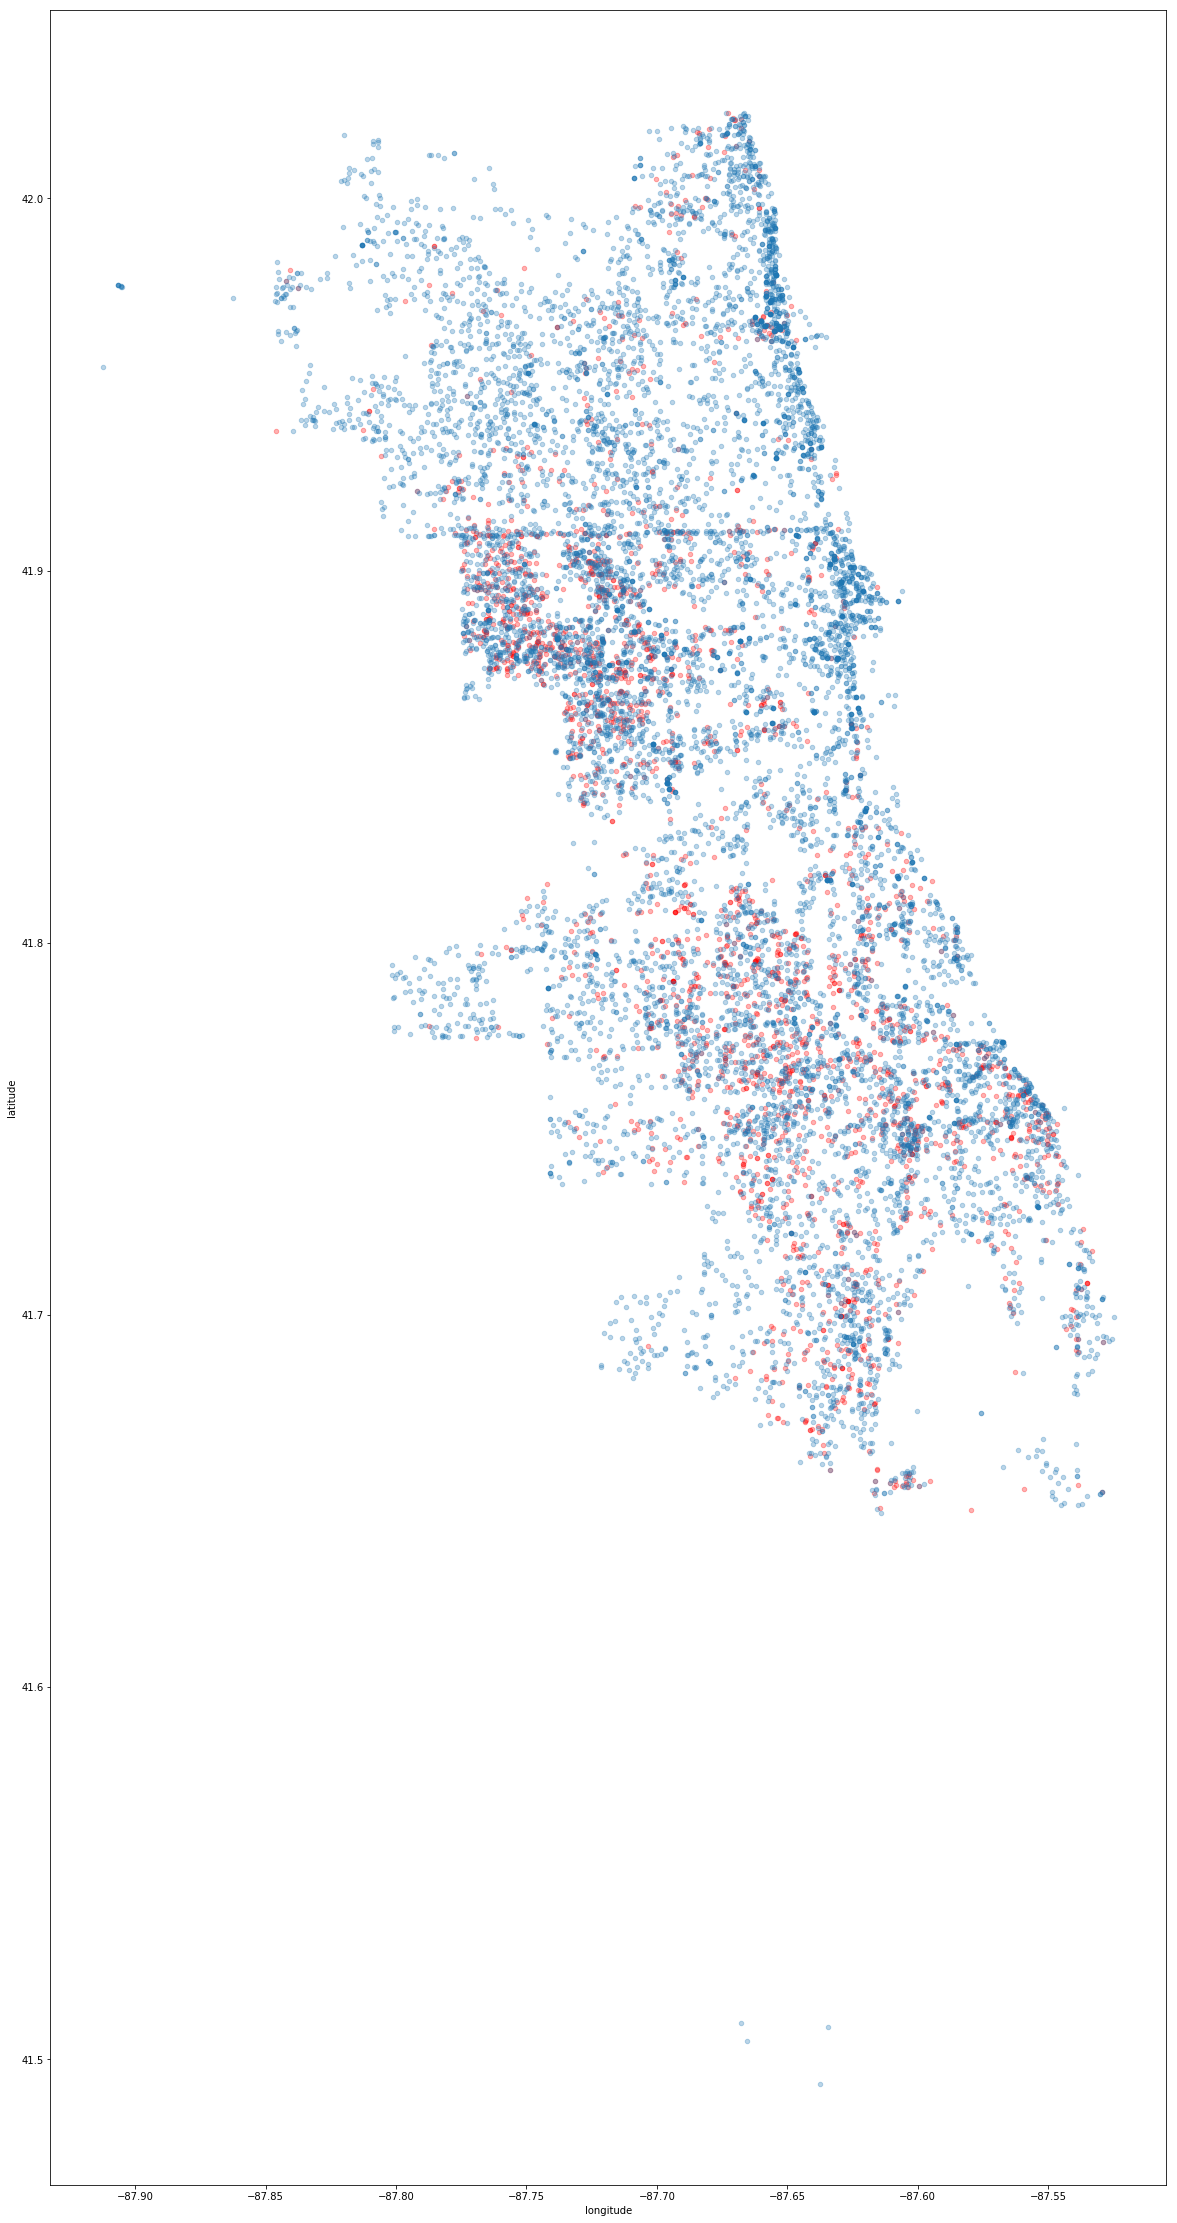

In [70]:
ax = chicago[(chicago['Manner of Death'] == 'HOMICIDE')].plot(color = 'red', alpha = 0.3, x = 'longitude', y = 'latitude', kind = 'scatter', figsize = (20,40))
chicago[~(chicago['Manner of Death'] == 'HOMICIDE')].plot(x = 'longitude', y = 'latitude', kind = 'scatter', figsize = (20,40), ax = ax, alpha = 0.3)

## Never tell anyone I let you do that.

But you want to see something actually completely legitimately insane?

**Chicago is one of the most segregated cities in America.** If you'd like to see this for yourself, make a map of `Race`. Plot black vs white in a way similar to what we did above.

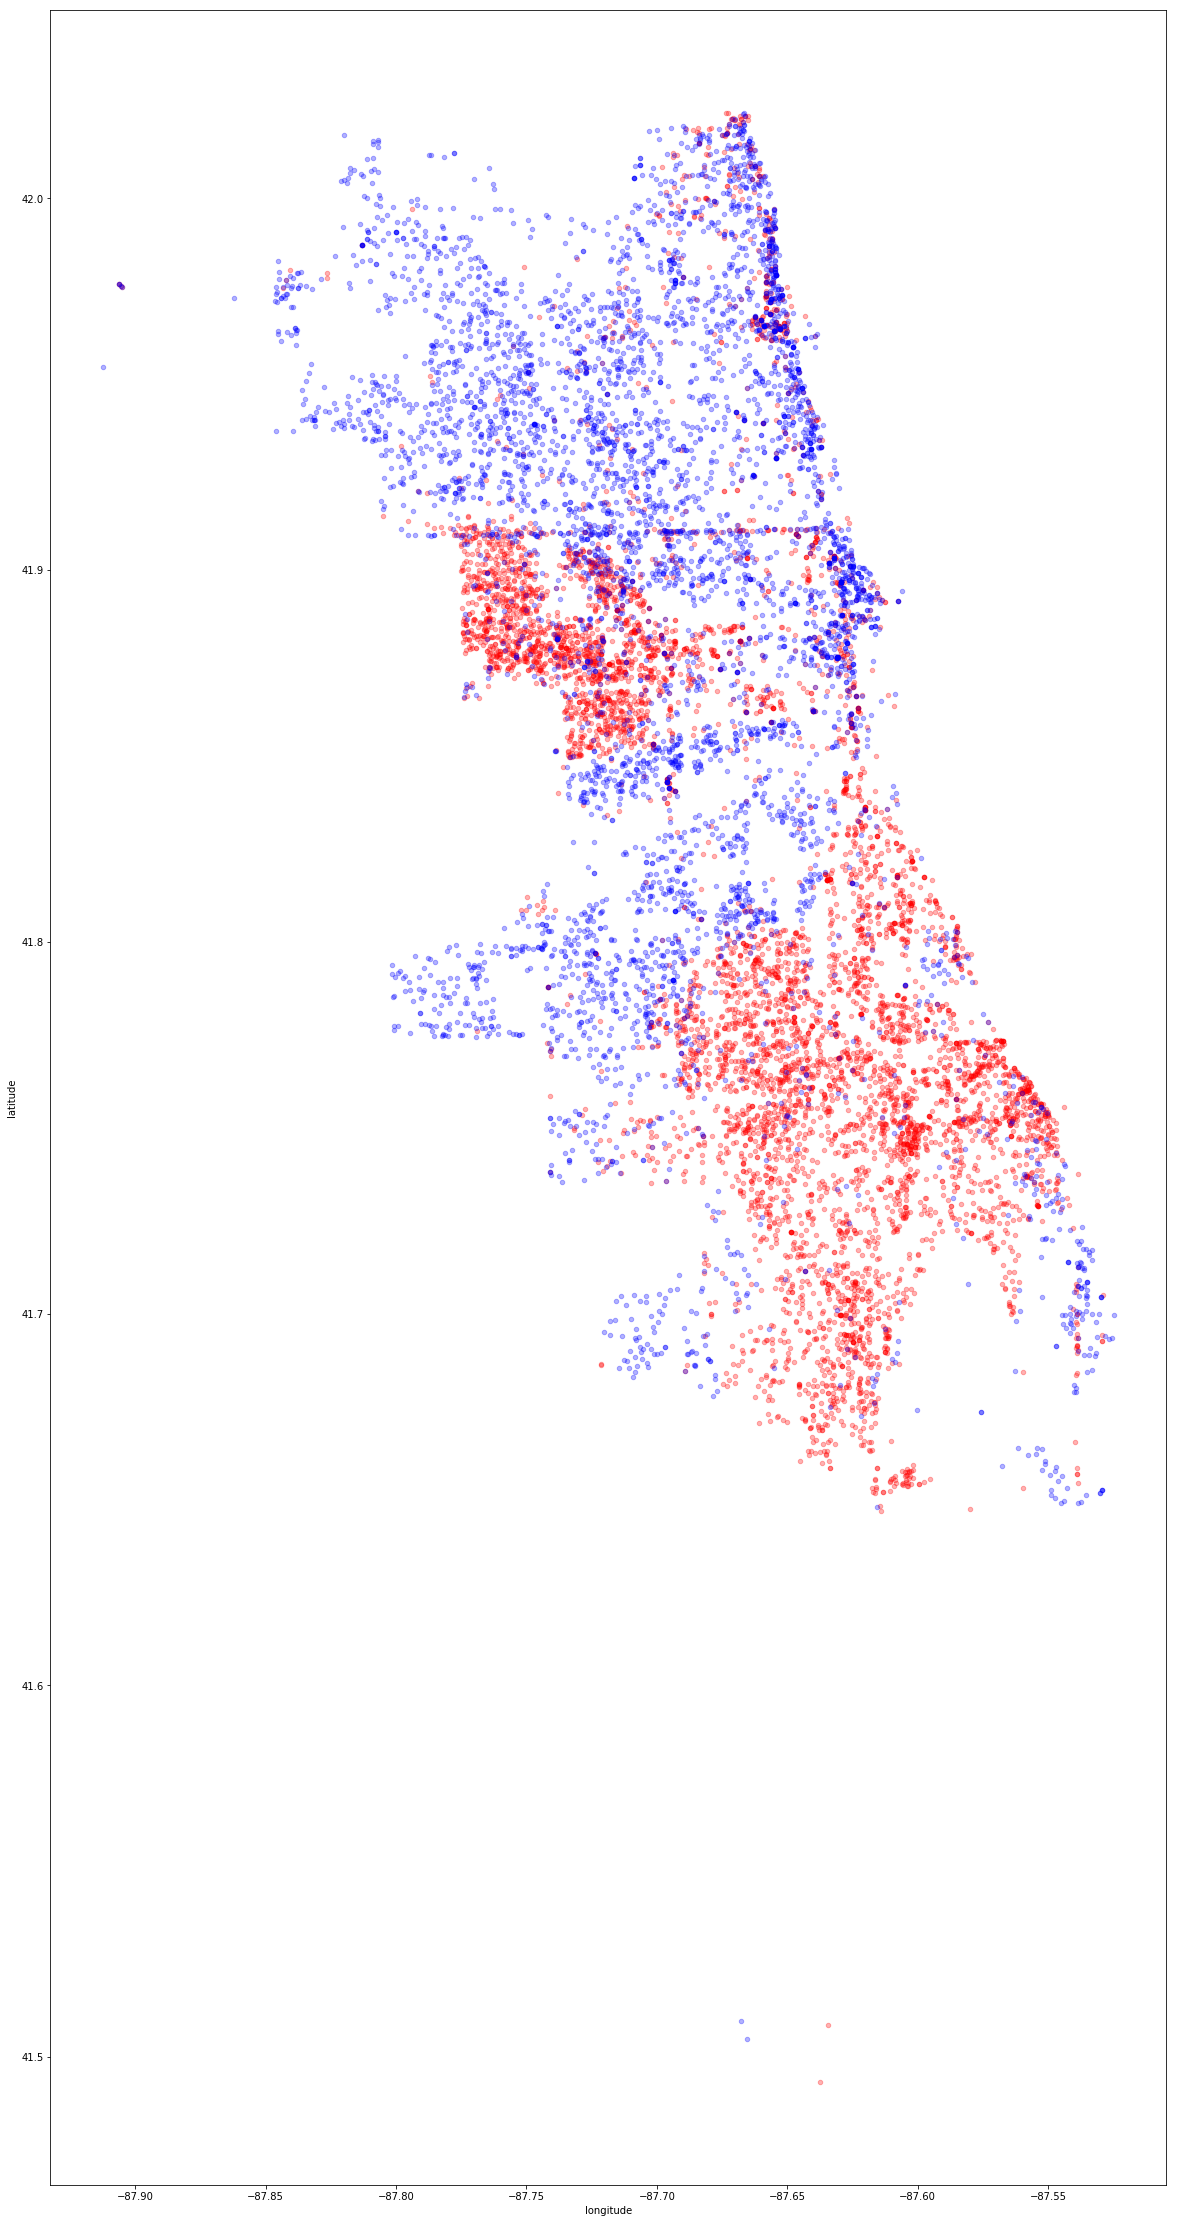

In [71]:
ax = chicago[chicago.Race == 'black'].plot(color = 'red', alpha = 0.3, x = 'longitude', y = 'latitude', kind = 'scatter', figsize = (20,40))
chicago[chicago.Race == 'white'].plot(color = 'blue', alpha = 0.3, x = 'longitude', y = 'latitude', kind = 'scatter', figsize = (20,40), ax = ax)

Yup.